In [1]:
from datetime import datetime

now = datetime.now()
today = now.strftime("%Y-%m-%d")
today

'2025-06-08'

1. manse_tool_agent
2. retriever_tool_agent
3. 일반 답변에 대한 web search

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Retriever 및 Chain 

In [4]:
from pdf_retriever_saju import pdf_rag_chain, compression_retriever

pdf_retriever = compression_retriever()
pdf_chain = pdf_rag_chain()

In [5]:
# Manse_tool

In [6]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from manse_tool import calculate_saju_tool

# Agent 생성 시 tools 리스트에 추가

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)
tools = [calculate_saju_tool]  # 사주 툴 추가

manse_tool_agent = create_react_agent(llm, tools)

In [7]:
response = manse_tool_agent.invoke({"messages": [("user", "1995년 3월 28일 남자, 대전출생")]})

In [8]:
print(response["messages"][-1].content)

1995년 3월 28일 대전에서 태어난 남성의 사주팔자를 분석해보면 다음과 같습니다.

년주는 을해, 월주는 기묘, 일주는 무오, 시주는 무오입니다. 일간은 무(土)입니다.

오행의 강약을 보면 토(土)가 가장 강하고, 그 다음으로 목(木), 화(火), 수(水)가 있으며 금(金)은 약한 편입니다.

십신 분석에서는 년주에 정관과 편재, 편관이 혼재되어 있고, 월주에는 겁재와 정관, 일주와 시주에는 정인과 겁재가 주로 나타납니다.

대운은 5세부터 무인, 15세부터 정축, 25세부터 병자, 35세부터 을해 대운이 순차적으로 들어옵니다.

이 사주는 토의 기운이 강해 안정적이고 현실적인 성향이 강하며, 목과 화의 기운이 있어 성장과 발전, 활동적인 면도 갖추고 있습니다. 금의 기운이 약해 결단력이나 변화에 대한 적응력은 다소 부족할 수 있으니 보완이 필요합니다.

더 구체적인 운세나 성격, 직업, 건강 등 궁금한 점이 있으면 알려주세요.


In [9]:
from langchain_core.tools.retriever import create_retriever_tool
from langchain_core.prompts import PromptTemplate


# PDF 문서를 기반으로 검색 도구 생성
retriever_tool = create_retriever_tool(
    pdf_retriever,
    "pdf_retriever",
    "A tool for searching information related to Saju (Four Pillars of Destiny)",
    document_prompt=PromptTemplate.from_template(
        "<document><context>{page_content}</context><metadata><source>{source}</source><page>{page}</page></metadata></document>"
    ),
)


In [10]:
retriever_tools = [retriever_tool]

In [11]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
from langchain_core.prompts import load_prompt, ChatPromptTemplate, MessagesPlaceholder

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

retriever_tool_agent = create_react_agent(llm, retriever_tools)

base_prompt = load_prompt("prompt/saju-rag-promt_korea2.yaml")
saju_prompt = ChatPromptTemplate.from_messages([
    ("system", base_prompt.template),
    MessagesPlaceholder("messages"),
])
retriever_tool_agent = create_react_agent(llm, retriever_tools, prompt=saju_prompt)

In [12]:
response = retriever_tool_agent.invoke({"messages": [("user", "1995년 3월 28일 남자의 사주 알려줘")]})

In [13]:
print(response["messages"][-1].content)

안녕하세요. 1995년 3월 28일 남성분의 사주를 분석해 드리겠습니다.

우선, 출생일시를 양력 기준으로 가정하고, 출생시간이 명시되지 않아 기본적으로 자시(23:00~01:00)로 가정하여 사주팔자를 구성하겠습니다. (출생시간을 알려주시면 더 정확한 분석이 가능합니다.)

---

## 1. 사주의 구성 (연·월·일·시의 천간지지)

- 출생일: 1995년 3월 28일 (양력)
- 성별: 남성
- 출생시간: 자시(23:00~01:00) 가정

### 천간지지 변환

- 연주(년간·년지): 1995년은 을해년(乙亥年)
  - 연간: 乙 (을)
  - 연지: 亥 (해)

- 월주(월간·월지): 3월 28일은 음력 2월 중순 경이며, 1995년 3월은 양력 기준으로 을묘월(乙卯月)입니다.
  - 월간: 乙 (을)
  - 월지: 卯 (묘)

- 일주(일간·일지): 1995년 3월 28일의 일간과 일지는 병진일(丙辰日)입니다.
  - 일간: 丙 (병)
  - 일지: 辰 (진)

- 시주(시간 간지): 자시(23:00~01:00)는 자시(子時)로,
  - 시간간: 丙 (병)
  - 시간지: 子 (자)

따라서, 사주팔자는 다음과 같습니다.

| 구분 | 천간 | 지지 |
|------|------|------|
| 연주 | 乙   | 亥   |
| 월주 | 乙   | 卯   |
| 일주 | 丙   | 辰   |
| 시주 | 丙   | 子   |

---

## 2. 오행 분포 및 균형

### 1단계: 천간지지 8자 확인

乙, 亥, 乙, 卯, 丙, 辰, 丙, 子

### 2단계: 각 천간지지를 오행으로 매핑 및 점수 부여

- 乙 → 목(木) +1
- 亥 → 수(水) +1
- 乙 → 목(木) +1
- 卯 → 목(木) +1
- 丙 → 화(火) +1
- 辰 → 토(土) +1
- 丙 → 화(火) +1
- 子 → 수(水) +1

### 3단계: 오행별 점수 합산 및 글자 목록화

| 오행   | 점수 | 글자             |
| ------ | ---- | ---

In [14]:
from langchain_community.utilities.duckduckgo_search import DuckDuckGoSearchAPIWrapper

In [15]:
from langchain_teddynote.tools.tavily import TavilySearch
from langchain.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults

tavily_tool = TavilySearch(
    max_results=5,
    include_domains=["namu.wiki", "wikipedia.org"]
)

duck_tool = DuckDuckGoSearchResults(
    max_results=5,
)

In [16]:
# web_tool = [tavily_tool]
web_tool = [tavily_tool, duck_tool]

In [17]:
prompt = """
사주 또는 사주 오행의 개념적 질문이나, 일상 질문이 들어오면, web search를 통해 답합니다.
"""
web_tool_agent = create_react_agent(llm, tools=web_tool, prompt=prompt)

In [18]:
response = web_tool_agent.invoke({"messages": [("user", "사주오행에 대해서 설명해줘")]})

In [19]:
response

{'messages': [HumanMessage(content='사주오행에 대해서 설명해줘', additional_kwargs={}, response_metadata={}, id='9149e4f5-6b1e-46e9-8553-e06b80b2c5fd'),
  AIMessage(content="사주오행은 동양 철학과 점성학에서 중요한 개념으로, 사람의 운명과 성격, 인생의 흐름을 해석하는 데 사용됩니다. '사주'는 태어난 연, 월, 일, 시의 네 기둥(四柱)을 의미하며, 각각의 기둥은 천간(하늘의 기운)과 지지(땅의 기운)로 구성되어 있습니다. 이 네 기둥을 통해 개인의 운명을 분석합니다.\n\n'오행'은 우주 만물을 구성하는 다섯 가지 기본 원소인 목(木), 화(火), 토(土), 금(金), 수(水)를 말합니다. 이 다섯 가지 원소는 서로 상생(서로 돕는 관계)과 상극(서로 제약하는 관계)을 통해 자연과 인간의 변화를 설명합니다.\n\n사주오행에서는 태어난 시점의 천간과 지지에 포함된 오행의 조합을 분석하여, 개인의 성격, 건강, 직업, 인간관계, 운세 등을 예측합니다. 예를 들어, 목이 강한 사람은 성장과 발전을 좋아하고, 화가 강하면 열정적이고 활동적인 성향을 가진다고 해석합니다.\n\n요약하자면, 사주오행은 사주(생년월일시)와 오행(목, 화, 토, 금, 수)의 조합을 통해 개인의 운명과 성격을 해석하는 동양의 전통적인 운명학 체계입니다. 더 궁금한 점이나 구체적인 사주풀이가 필요하면 알려주세요!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 353, 'prompt_tokens': 181, 'total_tokens': 534, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_predic

In [20]:
print(response["messages"][-1].content)

사주오행은 동양 철학과 점성학에서 중요한 개념으로, 사람의 운명과 성격, 인생의 흐름을 해석하는 데 사용됩니다. '사주'는 태어난 연, 월, 일, 시의 네 기둥(四柱)을 의미하며, 각각의 기둥은 천간(하늘의 기운)과 지지(땅의 기운)로 구성되어 있습니다. 이 네 기둥을 통해 개인의 운명을 분석합니다.

'오행'은 우주 만물을 구성하는 다섯 가지 기본 원소인 목(木), 화(火), 토(土), 금(金), 수(水)를 말합니다. 이 다섯 가지 원소는 서로 상생(서로 돕는 관계)과 상극(서로 제약하는 관계)을 통해 자연과 인간의 변화를 설명합니다.

사주오행에서는 태어난 시점의 천간과 지지에 포함된 오행의 조합을 분석하여, 개인의 성격, 건강, 직업, 인간관계, 운세 등을 예측합니다. 예를 들어, 목이 강한 사람은 성장과 발전을 좋아하고, 화가 강하면 열정적이고 활동적인 성향을 가진다고 해석합니다.

요약하자면, 사주오행은 사주(생년월일시)와 오행(목, 화, 토, 금, 수)의 조합을 통해 개인의 운명과 성격을 해석하는 동양의 전통적인 운명학 체계입니다. 더 궁금한 점이나 구체적인 사주풀이가 필요하면 알려주세요!


In [21]:
response = web_tool_agent.invoke({"messages": [("user", "오늘 날씨는 어때?")]})

In [22]:
response

{'messages': [HumanMessage(content='오늘 날씨는 어때?', additional_kwargs={}, response_metadata={}, id='51fbf578-a82e-44a5-afe6-555f09e16cba'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zWVWD0JFezfbdcYUtz2n0pQt', 'function': {'arguments': '{"query":"오늘 서울 날씨"}', 'name': 'tavily_web_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 179, 'total_tokens': 199, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-BfyCtttxoZyIBhHpx5t3VR0ozvJbD', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5e22c204-e8ff-4e40-b21e-75630d32e608-0', tool_calls=[{'name': 'tavily_web_search', 'args': {'query': '오늘 서울 날씨'}, 'id': 'c

# Agent node 생성

In [23]:
from langchain_core.messages import HumanMessage


# 지정한 agent와 name을 사용하여 agent 노드를 생성
def agent_node(state, agent, name):
    # agent 호출
    agent_response = agent.invoke(state)
    # agent의 마지막 메시지를 HumanMessage로 변환하여 반환
    return {
        "messages": [
            HumanMessage(content=agent_response["messages"][-1].content, name=name)
        ]
    }

In [24]:
# node 생성

# import functools

# manse_tool_agent = functools.partial(agent_node, agent=manse_tool_agent, name="ManseTool")
# retriever_tool_agent = functools.partial(agent_node, agent=retriever_tool_agent, name="RetrieverTool")
# web_tool_agent = functools.partial(agent_node, agent=web_tool_agent, name="WebTool")

# node 생성

import functools

manse_tool_agent_node = functools.partial(agent_node, agent=manse_tool_agent, name="ManseTool")
retriever_tool_agent_node = functools.partial(agent_node, agent=retriever_tool_agent, name="RetrieverTool")
web_tool_agent_node = functools.partial(agent_node, agent=web_tool_agent, name="WebTool")




In [25]:
manse_message = manse_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="1995년 3월 28일 남자")
        ]
    }
)
print(manse_message)

{'messages': [HumanMessage(content='1995년 3월 28일 남성의 사주팔자를 분석한 결과는 다음과 같습니다.\n\n- 년주: 을해\n- 월주: 기묘\n- 일주: 무오\n- 시주: 무오\n- 일간: 무\n\n오행 강약 점수는 목 39점, 화 20점, 토 68점, 금 0점, 수 10점으로 토의 기운이 가장 강하고 금의 기운이 약합니다.\n\n십신 분석에 따르면 년주는 정관과 편재, 편관의 기운이 혼합되어 있고, 월주는 겁재와 정관, 일주와 시주는 정인과 겁재의 기운이 주를 이룹니다.\n\n대운은 5세부터 10년 단위로 무인, 정축, 병자, 을해 순으로 변화합니다.\n\n더 구체적인 운세나 성격, 직업 적성 등에 대해 알고 싶으시면 말씀해 주세요.', additional_kwargs={}, response_metadata={}, name='ManseTool')]}


In [26]:
retriever_message =  retriever_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="1995년 3월 28일 남자 12시 30분")
        ]
    }
)
print(retriever_message)

{'messages': [HumanMessage(content='안녕하세요. 1995년 3월 28일 남자분의 사주를 전반적으로 분석해 드리겠습니다. 다만, 출생시간이 제공되지 않아 시주(시간의 천간지지)는 포함하지 않고, 연월일의 천간지지와 오행 분석을 중심으로 진행하겠습니다. 출생시간을 알려주시면 시주까지 포함한 더욱 정확한 분석이 가능합니다.\n\n---\n\n## 1. 사주의 구성 (연·월·일의 천간지지)\n\n- 1995년 3월 28일은 양력 기준입니다.\n- 1995년은 을해년(乙亥年)입니다.\n- 3월 28일은 음력으로 변환 시 2월 28일경이며, 월주는 음력 2월(보통 경진월 또는 계묘월 등으로 변환)로 확인해야 하나, 일반적으로 3월은 경진월(庚辰月) 또는 계묘월(癸卯月)일 수 있습니다. 정확한 월주는 절기 기준으로 산출해야 하나, 대략적으로 3월 28일은 경진월(庚辰月)로 추정됩니다.\n- 일주는 28일의 간지로 변환하면 병술일(丙戌日) 또는 다른 간지일 수 있으나, 정확한 음력 변환과 천간지지 변환이 필요합니다.\n\n※ 출생시간이 없으므로 시주는 분석에서 제외합니다.\n\n---\n\n## 2. 천간지지 변환 (예상)\n\n| 구분 | 천간 | 지지 |\n|------|------|------|\n| 연간 | 乙   | 亥   |\n| 월간 | 庚   | 辰   |\n| 일간 | 丙   | 戌   |\n\n(※ 출생시간 미제공으로 시주는 생략)\n\n---\n\n## 3. 오행 매핑 및 점수 부여\n\n### 3-1. 천간지지 → 오행 매핑 표\n\n- 목(木): 甲, 乙, 寅, 卯  \n- 화(火): 丙, 丁, 巳, 午  \n- 토(土): 戊, 己, 辰, 戌, 丑, 未  \n- 금(金): 庚, 辛, 申, 酉  \n- 수(水): 壬, 癸, 子, 亥  \n\n### 3-2. 각 글자별 오행 분류 및 점수\n\n| 글자 | 오행 | 점수 |\n|-------|-------|-------|\n| 乙    | 목    | 1     |\n| 亥  

In [27]:
web_message = web_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="사주오행에서의 불")
        ]
    }
)
print(web_message)

{'messages': [HumanMessage(content="사주오행에서 '불(火)'은 오행 중 하나로, 다섯 가지 기본 요소인 목(木), 화(火), 토(土), 금(金), 수(水) 중 '화(火)'를 의미합니다. 불은 다음과 같은 개념과 상징을 가집니다.\n\n1. 성질과 상징\n- 불은 열정, 에너지, 활력, 빛, 따뜻함을 상징합니다.\n- 밝고 강렬한 성질로, 변화와 성장, 발전을 의미합니다.\n- 사람의 성격으로는 열정적이고 적극적이며, 리더십과 추진력이 강한 특성을 나타냅니다.\n\n2. 계절과 방향\n- 불은 여름과 관련이 깊으며, 계절적으로는 한여름의 뜨거운 태양을 상징합니다.\n- 방향으로는 남쪽을 의미합니다.\n\n3. 색상과 관련\n- 불의 색은 붉은색, 주황색, 분홍색 등 따뜻하고 강렬한 색상입니다.\n\n4. 상호작용\n- 불은 목(木)을 생(生)하여 목이 불을 키우고, 불은 토(土)를 생하여 토를 돕습니다.\n- 반면, 불은 수(水)를 극(剋)하여 수를 억제합니다.\n\n사주에서 불의 위치와 세력에 따라 그 사람의 성격, 운명, 건강 등에 영향을 미치므로, 불의 강약과 조화를 보는 것이 중요합니다.\n\n더 구체적인 질문이나 사주팔자 내에서 불의 역할에 대해 알고 싶으시면 말씀해 주세요!", additional_kwargs={}, response_metadata={}, name='WebTool')]}


In [28]:
web_message2 = web_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="오늘의 날씨")
        ]
    }
)
print(web_message2)

{'messages': [HumanMessage(content='오늘의 날씨 정보는 현재 위치나 지역에 따라 다르기 때문에 구체적인 지역을 알려주시면 더 정확한 정보를 드릴 수 있습니다. \n\n일반적으로 오늘의 날씨는 기상청 날씨누리(https://www.weather.go.kr/)에서 확인할 수 있으며, 최고/최저 온도, 강수량, 바람, 습도 등 다양한 정보를 제공합니다.\n\n필요하시면 특정 지역의 오늘 날씨를 알려주세요.', additional_kwargs={}, response_metadata={}, name='WebTool')]}


# Agent Supervisor 생성

In [29]:
from pydantic import BaseModel
from typing import Literal

# 멤버 Agent 목록 정의
members = ["ManseTool", "RetrieverTool", "WebTool"]

# 다음 작업자 선택 옵션 목록 정의
options_for_next = ["FINISH"] + members


# 작업자 선택 응답 모델 정의: 다음 작업자를 선택하거나 작업 완료를 나타냄
class RouteResponse(BaseModel):
    next: Literal[*options_for_next]

In [39]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI


# 시스템 프롬프트 정의: 작업자 간의 대화를 관리하는 감독자 역할
system_prompt = (
    "You are a supervisor tasked with orchestrating a multi-step workflow with the following specialized agents: {members}.\n"
    "The tools are:\n"
    "- ManseTool: For extracting and calculating Saju information (year, month, day, hour pillars) from user input (such as date/time of birth).\n"
    "- RetrieverTool: For interpreting Saju details and providing in-depth Saju or Four Pillars explanations and analysis based on calculated information.\n"
    "- WebTool: For answering general or conceptual questions about Saju, or handling everyday/non-specialized queries, by searching the web.\n\n"

    "Your job is to:\n"
    "1. Route the user's request to the most appropriate tool:\n"
    "   - If the user input contains raw birth information (date/time, etc.), ALWAYS call ManseTool FIRST.\n"
    "   - IMPORTANT: **After using ManseTool, you MUST ALWAYS call RetrieverTool next to interpret the calculated Saju results, before finishing or moving to any other step. Do NOT skip this step.**\n"
    "   - If the input is purely a general, conceptual, or non-specialized Saju question, and does NOT require Saju calculation, call WebTool.\n"
    "2. NEVER finish the workflow after ManseTool alone. Always pass the result to RetrieverTool before considering FINISH.\n"
    "3. After all needed steps are complete, respond with FINISH.\n"
    "You MUST always decide the most logical next agent for the task and strictly follow this tool sequence."
)


# ChatPromptTemplate 생성
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Given the conversation above, who should act next? "
            "Or should we FINISH? Select one of: {options}",
        ),
    ]
).partial(options=str(options_for_next), members=", ".join(members))


# LLM 초기화
llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)


# Supervisor Agent 생성
def supervisor_agent(state):
    # 프롬프트와 LLM을 결합하여 체인 구성
    supervisor_chain = prompt | llm.with_structured_output(RouteResponse)
    # Agent 호출
    return supervisor_chain.invoke(state)

In [40]:
import operator
from typing import Sequence, Annotated
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage


# 상태 정의
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]  # 메시지
    next: str  # 다음으로 라우팅할 에이전트

In [41]:
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

# 그래프 생성
workflow = StateGraph(AgentState)

# 그래프에 노드 추가: members = ["ManseTool", "RetrieverTool", "WebTool"]
workflow.add_node("ManseTool", manse_tool_agent_node)
workflow.add_node("RetrieverTool", retriever_tool_agent_node)
workflow.add_node("WebTool", web_tool_agent_node)
workflow.add_node("Supervisor", supervisor_agent)


# 멤버 노드 > Supervisor 노드로 엣지 추가
for member in members:
    workflow.add_edge(member, "Supervisor")

# 조건부 엣지 추가 (
conditional_map = {k: k for k in members}
conditional_map["FINISH"] = END


def get_next(state):
    return state["next"]


# Supervisor 노드에서 조건부 엣지 추가
workflow.add_conditional_edges("Supervisor", get_next, conditional_map)

# 시작점
workflow.add_edge(START, "Supervisor")

# 그래프 컴파일
graph = workflow.compile(checkpointer=MemorySaver())

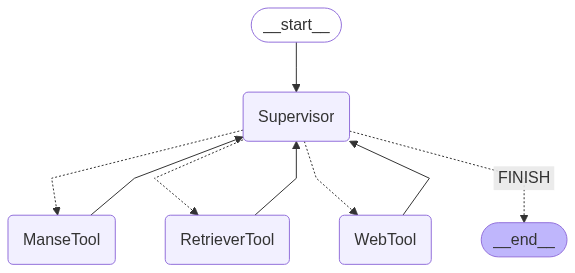

In [42]:
graph

In [43]:
# from langchain_core.runnables import RunnableConfig
# from langchain_teddynote.messages import random_uuid, invoke_graph

# # config 설정(재귀 최대 횟수, thread_id)
# config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# # 질문 입력
# inputs = {
#     "messages": [
#         HumanMessage(
#             content="1995년 3월 28일 남자, 12시 30분 출생 운세봐줘"
#         )
#     ],
# }

# # 그래프 실행
# invoke_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
next:
ManseTool

🔄 Node: agent in [ManseTool] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================== Ai Message ==================================
Tool Calls:
  calculate_saju_chart (call_Dj8sen3xVKoV2nBhJFv24iut)
 Call ID: call_Dj8sen3xVKoV2nBhJFv24iut
  Args:
    year: 1995
    month: 3
    day: 28
    hour: 12
    minute: 30
    is_male: True
    timezone: Asia/Seoul

🔄 Node: tools in [ManseTool] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================= Tool Message =================================
Name: calculate_saju_chart

=== 사주팔자 ===
년주(年柱): 을해
월주(月柱): 기묘
일주(日柱): 무오
시주(時柱): 무오
일간(日干): 무

=== 오행 강약 ===
목: 39점
화: 20점
토: 68점
금: 0점
수: 10점

=== 십신 분석 ===
년주: 천간:정관, 지지:편재(70%), 지지:편관(30%)
월주: 천간:겁재, 지지:정관(100%)
일주: 지지:정인(70%), 지지:겁재(30%)
시주: 지지:정인(70%), 지지:겁재(30%)

=== 대운 (정밀 계산) ===
5세: 무인 (2000년 ~ 2009년)
15세: 정축 (2010년 ~ 2019년)
25세: 병자 (2020년 ~ 202

In [51]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="1995년 3월 28일 남자, 12시 30분 출생 운세봐줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"ManseTool"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
=== 사주팔자 ===
년주(年柱): 을해
월주(月柱): 기묘
일주(日柱): 무오
시주(時柱): 무오
일간(日干): 무

=== 오행 강약 ===
목: 39점
화: 20점
토: 68점
금: 0점
수: 10점

=== 십신 분석 ===
년주: 천간:정관, 지지:편재(70%), 지지:편관(30%)
월주: 천간:겁재, 지지:정관(100%)
일주: 지지:정인(70%), 지지:겁재(30%)
시주: 지지:정인(70%), 지지:겁재(30%)

=== 대운 (정밀 계산) ===
5세: 무인 (2000년 ~ 2009년)
15세: 정축 (2010년 ~ 2019년)
25세: 병자 (2020년 ~ 2029년)
35세: 을해 (2030년 ~ 2039년)
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
1995년 3월 28일 12시 30분 출생 남성의 사주팔자를 분석해보면 다음과 같습니다.

년주는 을해, 월주는 기묘, 일주는 무오, 시주는 무오입니다. 일간은 무입니다.

오행의 강약은 목 39점, 화 20점, 토 68점, 금 0점, 수 10점으로 토의 기운이 가장 강하고 금의 기운이 약합니다.

십신 분석에서는 년주에 정관과 편재, 편관이 있고, 월주에 겁재와 정관, 일주와 시주에는 정인과 겁재가 혼재되어 있습니다.

대운은 5세부터 무인, 15세부터 정축, 25세부터 병자, 35세부터 을해 대운이 순차적으로 들어옵니다.

이 정보를 바탕으로 운세나 성격, 인생의 흐름 등을 더 구체적으로 알고 싶으시면 말씀해 

In [52]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="아까 나의 생년월일이 뭐라고?"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"FINISH"}

In [53]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="안녕"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"FINISH"}

In [44]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, invoke_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="사주의 개념에 대해서 알려줘"
        )
    ],
}

# 그래프 실행
invoke_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
next:
WebTool

🔄 Node: agent in [WebTool] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================== Ai Message ==================================

사주(四柱)는 한국과 중국 등 동아시아에서 전통적으로 사용되는 운명학의 한 분야로, 사람의 태어난 연도, 월, 일, 시를 기준으로 하여 그 사람의 운명과 성격, 인생의 흐름 등을 해석하는 체계입니다. 

사주는 '네 기둥'이라는 뜻으로, 태어난 연도, 월, 일, 시를 각각 한 기둥으로 보고, 이 네 기둥에 해당하는 천간(天干)과 지지(地支)를 조합하여 분석합니다. 천간과 지지는 각각 10가지와 12가지가 있으며, 이들이 결합하여 60갑자라는 주기적인 체계를 이룹니다.

사주를 통해 개인의 성격, 건강, 직업, 인간관계, 운세의 흐름 등을 예측하고 조언하는 데 사용됩니다. 또한, 오행(목, 화, 토, 금, 수)의 상생과 상극 관계를 바탕으로 균형과 조화를 중요시합니다.

요약하면, 사주는 태어난 시간의 천간과 지지를 바탕으로 개인의 운명과 성격을 해석하는 동아시아 전통 운명학 체계입니다. 더 궁금한 점이나 구체적인 내용이 있으면 알려주세요!

🔄 Node: WebTool 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================ Human Message =================================
Name: WebTool

사주(四柱)는 한국과 중국 등 동아시아에서 전통적으로 사용되는 운명학의 한 분야로, 사람의 태어난 연도, 월, 일, 시를 기준으로 하여 그 사람의 운명과 성격, 인생의 흐름 등을 해석하는 체계입

In [45]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="사주의 개념에 대해서 알려줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"WebTool"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
사주(四柱)는 한국과 중국 등 동아시아에서 전통적으로 사용되는 운명학의 한 분야로, 사람의 태어난 연도, 월, 일, 시를 기준으로 하여 그 사람의 운명과 성격, 미래의 길흉화복을 예측하는 체계입니다. 

사주는 '네 기둥'이라는 뜻으로, 태어난 연도, 월, 일, 시를 각각 한 기둥으로 보고, 이 네 기둥을 조합하여 분석합니다. 각 기둥은 천간(10간)과 지지(12지)로 이루어져 있으며, 이를 통해 오행(목, 화, 토, 금, 수)의 상호작용과 음양의 조화를 살펴봅니다.

사주를 통해 개인의 타고난 성격, 건강, 직업, 인간관계, 운세의 흐름 등을 해석할 수 있다고 믿으며, 이를 바탕으로 인생의 방향을 잡거나 중요한 결정을 내리는 데 참고하기도 합니다.

더 구체적인 내용이나 사주 오행에 대한 설명이 필요하면 알려주세요!
🔄 Node: WebTool 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
사주(四柱)는 한국과 중국 등 동아시아에서 전통적으로 사용되는 운명학의 한 분야로, 사람의 태어난 연도, 월, 일, 시를 기준으로 하여 그 사람의 운명과 성격, 미래의 길흉화복을 예측하는 체계입니다. 

사주는 '네 기둥'이라는 뜻으로, 태어난 연도, 월, 일, 시를 각각 한 기둥으로 보고, 이 네 기둥을 조합하여 분석합니다. 각 기둥은 천간(10간)과 지지(12지)로 이루어져 있으며, 이를 통해 오행(목, 화, 토, 금, 수)의 상호작용과 음양의 조화를 살펴봅니다.

사주를 통해 개인의 타고난 성격, 건강, 직업, 인간관계, 운세의 흐름 등을 해석할 수 있다고 믿으며, 이를 바탕으로 인생의 방향을 잡거나 중요한 결정을 내리는 데 참고하기도 합니

In [36]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, invoke_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="내일 날씨 알려줘"
        )
    ],
}

# 그래프 실행
invoke_graph(graph, inputs, config)


🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
next:
WebTool

🔄 Node: agent in [WebTool] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (call_ZXVxm3rzdv6ThVTbIy1K9nLu)
 Call ID: call_ZXVxm3rzdv6ThVTbIy1K9nLu
  Args:
    query: 내일 날씨

🔄 Node: tools in [WebTool] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================= Tool Message =================================
Name: tavily_web_search

[{"title": "날씨 - 나무위키", "url": "https://namu.wiki/w/날씨", "content": "[ 펼치기 · 접기 ] **대기과학 Metorology**기상학 · 기단 · 기압(고기압, 저기압, 기압계, 기압골) · 기후학 · 나비 효과 · 날씨 · 대기권(성층권, 중간권, 열권, 외기권) · 대기 대순환(편서풍) · 열대성 저기압(태풍, 허리케인) · 제트기류 · 토네이도 · 용오름 · 푄 현상 · 쾨펜의 기후 구분((A)열대 기후, (B)건조 기후, (C)온대 기후, (D)냉대 기후, (E)한대 기후 · 고산 기후) **지질학 Geology**지질학자 · 고생물학 · 광물학 · 지구의 내부 구조(지각 \"지각(지구)\"), 맨틀, 외핵, 내핵) · 대륙이동설 · 암석학 · 층서학 · 지사학 · 지구물리학 · (지진, 지진파) · 판 구조